<a href="https://colab.research.google.com/github/LaraHossam/An-Object-Oriented-Drawing-And-Painting-Application/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis


In [ ]:
import os
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display as disp
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras.utils import np_utils
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import opendatasets as od

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en")

100%|██████████| 987M/987M [00:12<00:00, 83.9MB/s]


### 1. Download the Dataset and Understand the Format (10 Points) 

In [ ]:
path = "/content/speech-emotion-recognition-en/Crema/" 

In [ ]:
# Dictionary of emotions to convert from the string 
def to_emotion(emotion):
    emotions = {
        'SAD' : 'sad',
        'ANG' : 'angry',
        'DIS' : 'disgust',
        'NEU' : 'neural',
        'HAP' : 'happy',
        'FEA' : 'fear'
    }
    return emotions[emotion]

In [ ]:
file_names = os.listdir(path)

In [ ]:
# Define 2 empty lists to add the paths and the corresponding emotions
audio_path = []
audio_emotion = []

In [ ]:
for file in file_names:
    audio_path.append(os.path.join(path,file))
    emotion = file.split('_')[2]
    audio_emotion.append(to_emotion(emotion))

In [ ]:
# Create a Dataframe of audio_path and corresponding audio_emotion
dataset = pd.DataFrame({'path':audio_path,'emotion':audio_emotion})

In [ ]:
dataset

,path,emotion
0,/content/speech-emotion-recognition-en/Crema/1...,happy
1,/content/speech-emotion-recognition-en/Crema/1...,happy
2,/content/speech-emotion-recognition-en/Crema/1...,fear
3,/content/speech-emotion-recognition-en/Crema/1...,happy
4,/content/speech-emotion-recognition-en/Crema/1...,happy
...,...,...
7437,/content/speech-emotion-recognition-en/Crema/1...,happy
7438,/content/speech-emotion-recognition-en/Crema/1...,happy
7439,/content/speech-emotion-recognition-en/Crema/1...,neural
7440,/content/speech-emotion-recognition-en/Crema/1...,sad


In [ ]:
dataset = dataset.sort_values('path')

<Axes: xlabel='emotion', ylabel='Count'>

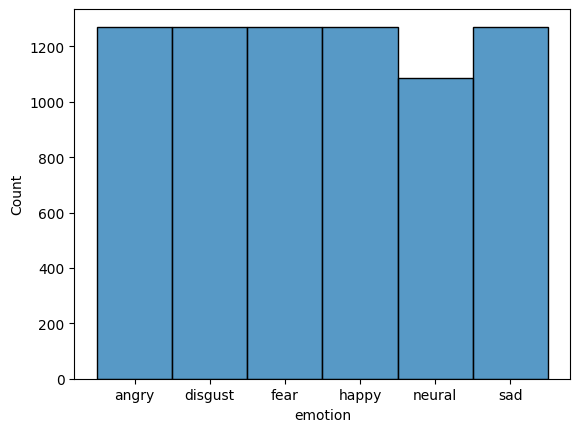

In [ ]:
# Exploring counts of each emotion and exploring whether the data is balanced or not
sns.histplot(dataset.emotion)

In [ ]:
# Creating new dataset with only an instance of each emotion
df = dataset.drop_duplicates(subset='emotion', keep='first', inplace=False, ignore_index=True)
df

,path,emotion
0,/content/speech-emotion-recognition-en/Crema/1...,angry
1,/content/speech-emotion-recognition-en/Crema/1...,disgust
2,/content/speech-emotion-recognition-en/Crema/1...,fear
3,/content/speech-emotion-recognition-en/Crema/1...,happy
4,/content/speech-emotion-recognition-en/Crema/1...,neural
5,/content/speech-emotion-recognition-en/Crema/1...,sad


In [ ]:
emotions = list(df['emotion'])
emotions

['angry', 'disgust', 'fear', 'happy', 'neural', 'sad']

#### Write your own function that loads an audio and listen to each of the classes you have and plot the waveform of the audio.

In [ ]:
def explore():
    for audio_path, emotion in zip(df['path'], df['emotion']):
        data, sampling_rate = librosa.load(audio_path);
        plt.figure()
        disp.waveshow(data, sr = sampling_rate)
        plt.title(f'Waveform for {emotion} audio')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.show()
        ipd.display(ipd.Audio(data, rate = sampling_rate))

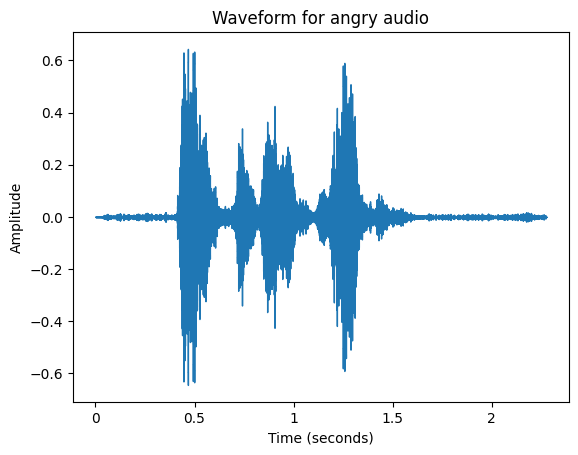

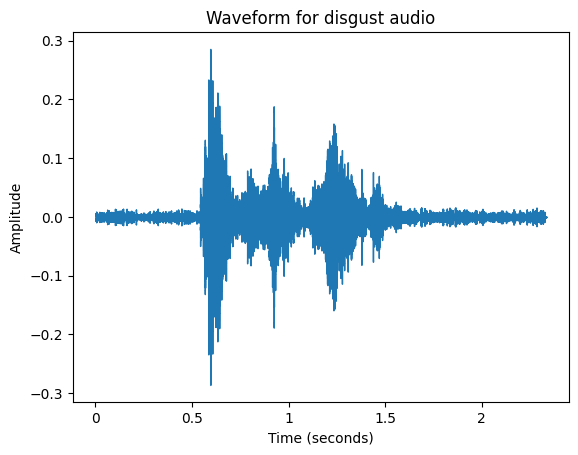

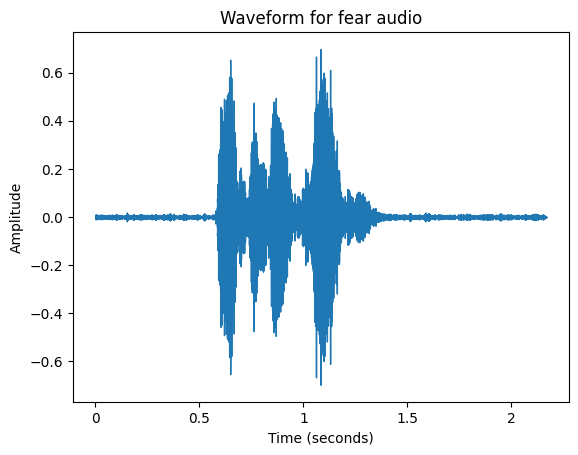

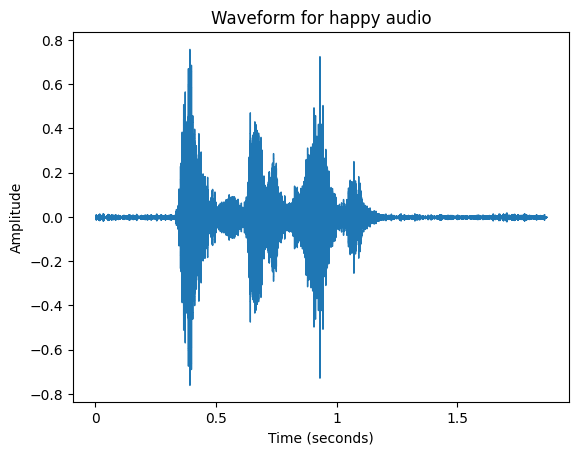

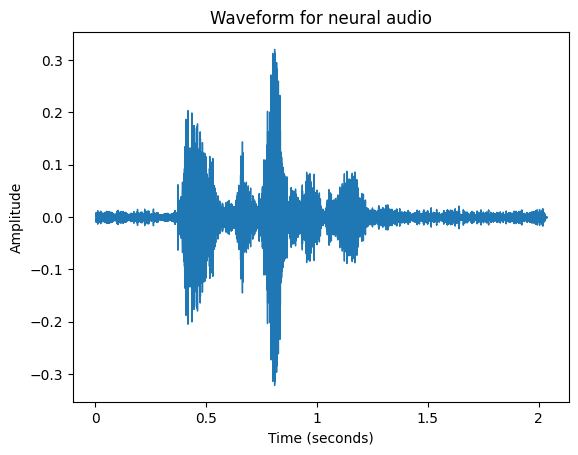

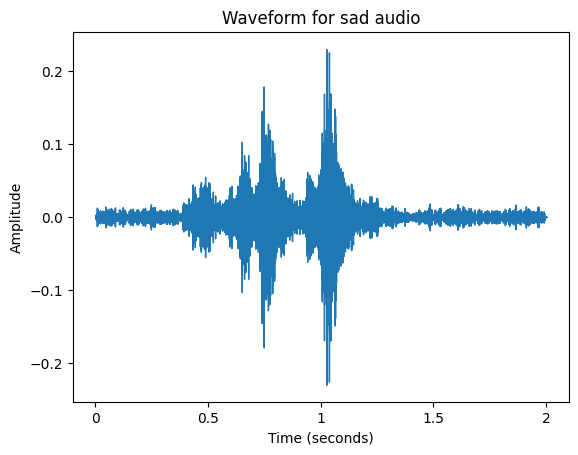

In [ ]:
explore()

### 2. Create the Feature Space [1D representation] (30 Points)

In [ ]:
# Creating feature representation for Energy to explore dataset
y, sr = librosa.load('/content/speech-emotion-recognition-en/Crema/1001_DFA_SAD_XX.wav')
energy = librosa.feature.rms(y = y)

In [ ]:
energy.shape

(1, 87)

In [ ]:
# Creating feature representation for Zero Crossing Rate
y, sr = librosa.load('/content/speech-emotion-recognition-en/Crema/1001_DFA_SAD_XX.wav')
zcr = librosa.feature.zero_crossing_rate(y = y)

In [ ]:
zcr.shape

(1, 87)

### Data Augmentation

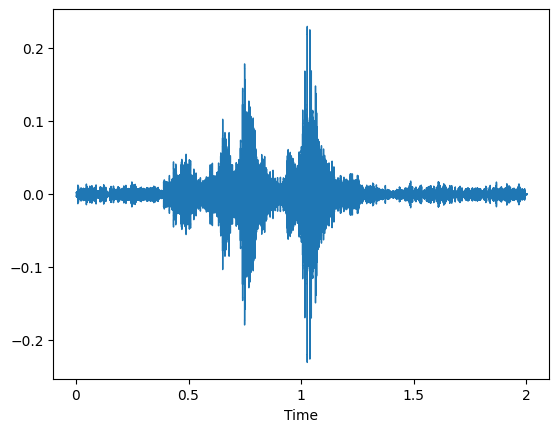

In [ ]:
# Audio file before any data augmentation to track differences 
disp.waveshow(y, sr = sr)
ipd.display(ipd.Audio(y, rate = sr))

##### Stretching:
Time stretching is a common audio augmentation technique used to modify the duration of an audio signal without altering its pitch. This technique is useful for creating variations of an audio signal that may have different lengths or durations, while maintaining the original characteristics of the sound.

In [ ]:
# Explore different augmentation techniques to get an intuition of the effect it may have on result
def stretch(data, rate = 0.8):
    return librosa.effects.time_stretch(data, rate = rate)

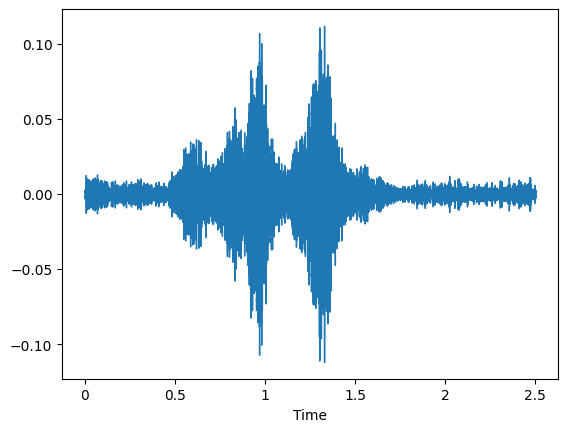

In [ ]:
disp.waveshow(stretch(y), sr = sr)
ipd.display(ipd.Audio(stretch(y), rate = sr))

###### Shifting:

In [ ]:
def shift(data, rate = 1000):
    shift_range = int(np.random.uniform(low = -5, high = 5)*rate)
    return np.roll(data, shift_range)

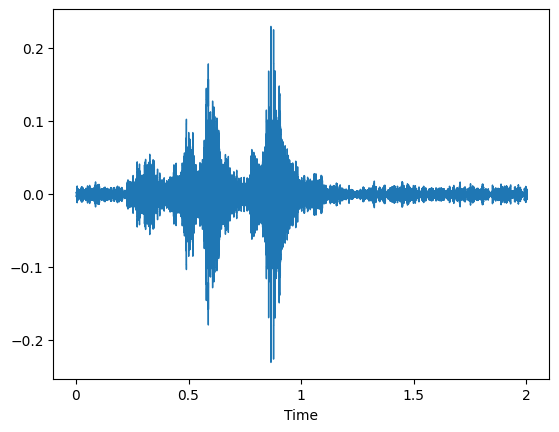

In [ ]:
disp.waveshow(shift(y), sr = sr)
ipd.display(ipd.Audio(shift(y), rate = sr))

###### Pitch:

In [ ]:
def pitch(data, sampling_rate, pitch_factor = 0.5):
    pitch_factor = np.random.random()*pitch_factor
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = pitch_factor)

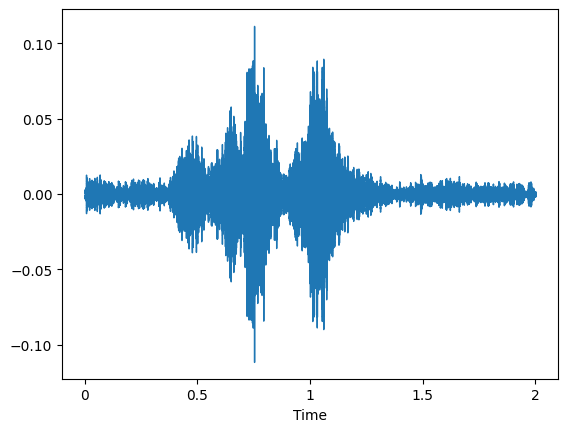

In [ ]:
disp.waveshow(pitch(y, sr), sr = sr)
ipd.display(ipd.Audio(pitch(y, sr), rate = sr))

###### Noise:

In [ ]:
def noise(data, threshold = 0.075):
    rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp * np.random.normal(size = data.shape[0])
    return data

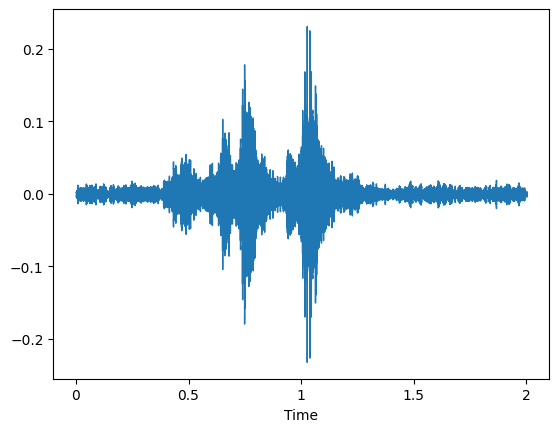

In [ ]:
disp.waveshow(noise(y), sr = sr)
ipd.display(ipd.Audio(noise(y), rate = sr))

##### Creating the 1D feature space using the following features:
1. `Zero Crossing Rate` : The rate of sign-change of the signal during the duration of a particular frame.
2. `Energy`: The sum of squares of the signal values, normalized by the respective frame length.
3. `MFCCs Mel Frequency Cepstral Coefficients` form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
4. `Spectral Rolloff` : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.


In [ ]:
# Zero Crossing Rate
def zcr(data, frame_length = 2048, hop_length = 512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

In [ ]:
# Energy
def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length

In [ ]:
# MFCC
def mfcc(data, sr, frame_length=2048, hop_length=512):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.ravel(mfcc_feature.T)

In [ ]:

from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau# Explore format of results of the features:
data, sr = librosa.load(dataset['path'][0])
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("MFCC: ", mfcc(data, sr).shape)

ZCR:  (65,)
Energy:  (65,)
MFCC:  (1300,)


In [ ]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        energy(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)))
    return result

In [ ]:
data, sr = librosa.load(dataset['path'][0])
extract_features(data,sr).shape

(1430,)

In [ ]:
def get_features(path, duration=2.5, offset=0.6):
    data, sample_rate = librosa.load(path, duration=duration, offset=offset)

     # Without Augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # Data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # Data with pitching
    pitched_data = pitch(data, sample_rate)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # Data with white_noise
    new_data = pitch(data, sample_rate)
    data_noise_pitch = noise(new_data)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
get_features(dataset['path'][0]).shape

(4, 858)

In [ ]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(dataset['path'], dataset['emotion'], range(dataset['path'].shape[0])):
    features = get_features(path)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")
    for feature in features:
        X.append(feature)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
print("Done.")

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...
500 samples has been processed...
600 samples has been processed...
700 samples has been processed...
800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...


In [ ]:
# Saving new dataset in a separate file for further processing
features_path = "features.csv"
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.head()

In [ ]:
extracted_df = extracted_df.fillna(0)

In [ ]:
extracted_df.head()

In [ ]:
extracted_df.to_csv(features_path, index=False)

In [ ]:
df_encoded_all = pd.get_dummies(extracted_df, columns=['labels'])
labels = np.array(df_encoded_all.iloc[:, -6:])
labels

In [ ]:
X = extracted_df.drop(labels="labels", axis=1)
Y = labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3, shuffle=True, stratify = Y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.05, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_train.shape

In [ ]:
X_val = np.expand_dims(X_val, axis=2)
X_val.shape

In [ ]:
X_test = np.expand_dims(X_test, axis=2)
X_test.shape

**Accuracy Measures**

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

**1-D CNN Model**

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc", f1_m])

In [ ]:
model.summary()

In [ ]:
EPOCHS = 50
batch_size = 64

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=EPOCHS, batch_size=batch_size,
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/50
103/310 [========>.....................] - ETA: 37:41 - loss: 1.7518 - acc: 0.3398 - f1_m: 0.2297

KeyboardInterrupt: ignored

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
y_check = np.argmax(y_test, axis=1)
y_check

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
path_to_model = "./res_model.h5"

model.save(path_to_model)